✅ Arquivo de taxas lido com sucesso de: ../../../planilhas/processado/modulo_4/taxas_por_uf_regiao_cine/taxas_por_regiao.csv
Períodos detectados nos dados: ['2019.0.1.0', '2019.0.2.0', '2020.0.1.0', '2020.0.2.0', '2021.0.1.0', '2021.0.2.0']

--- Processando CINE: Agricultura, silvicultura, pesca e veterinária ---


<ipython-input-1-c125b27481db>:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_melted['taxa_valor'].fillna(0, inplace=True)


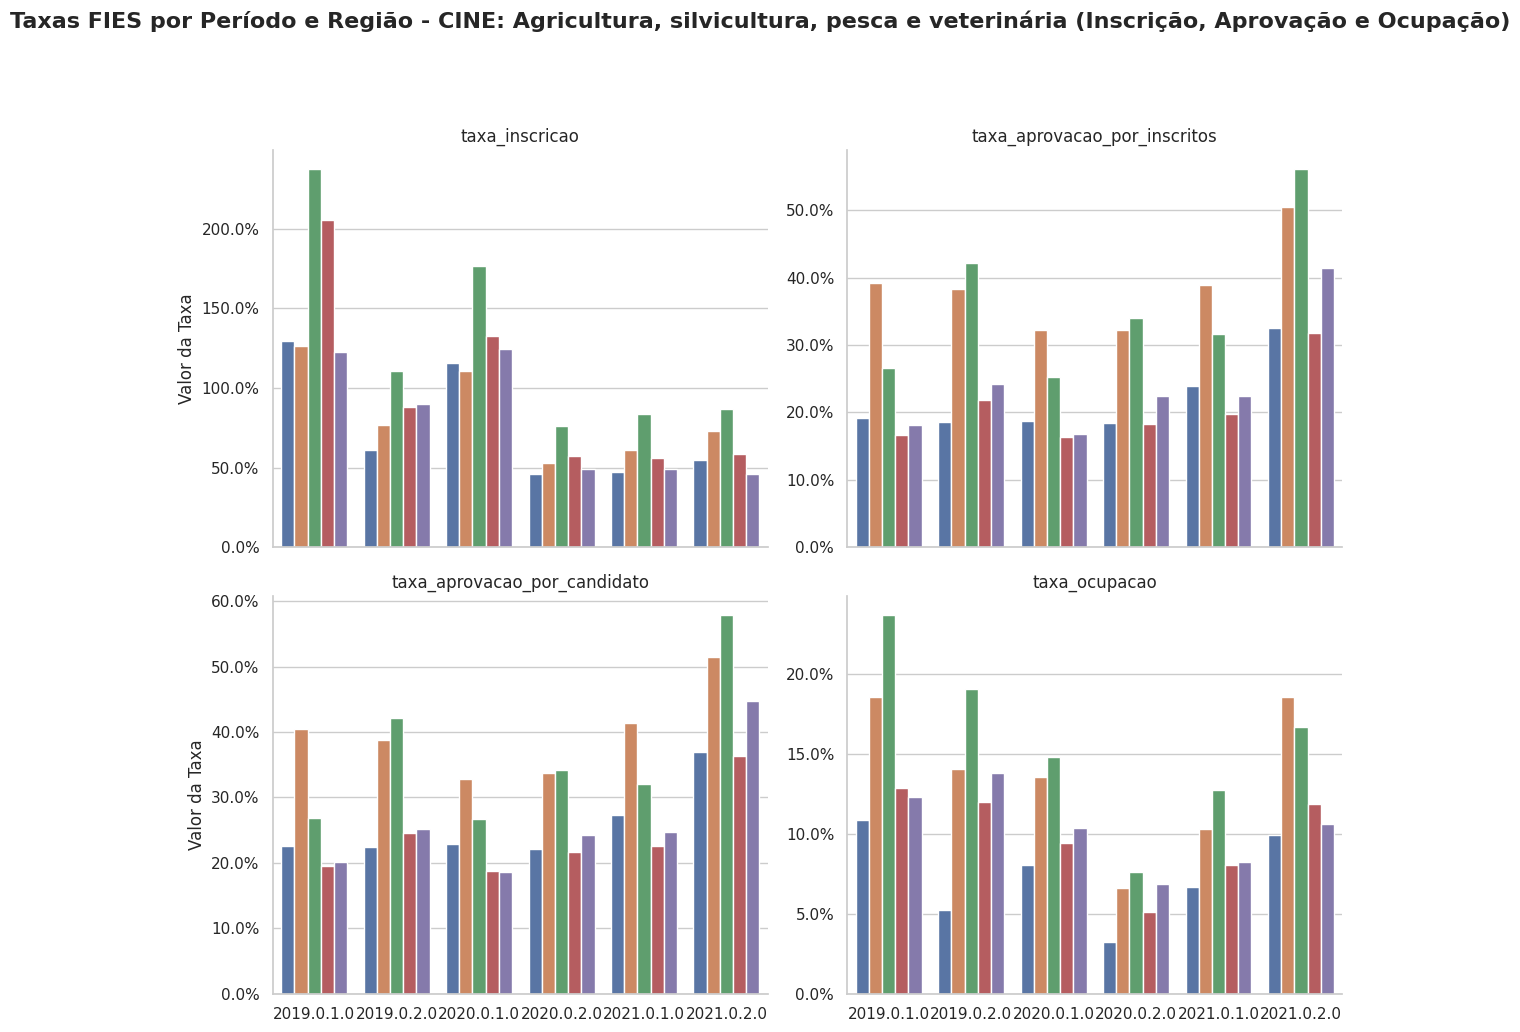

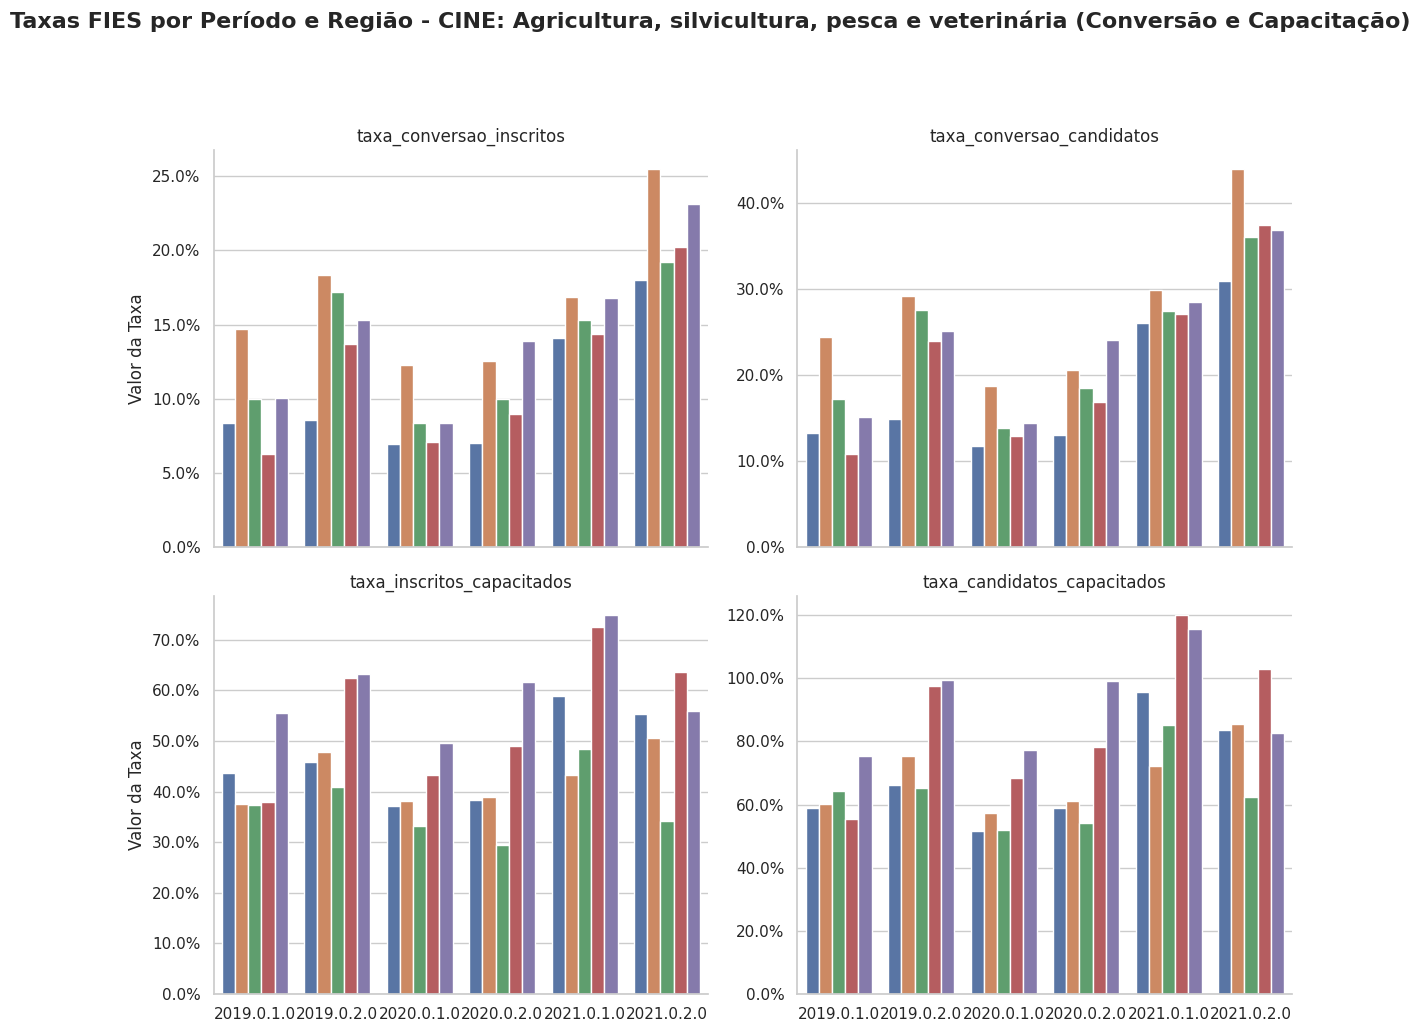


--- Processando CINE: Artes e humanidades ---


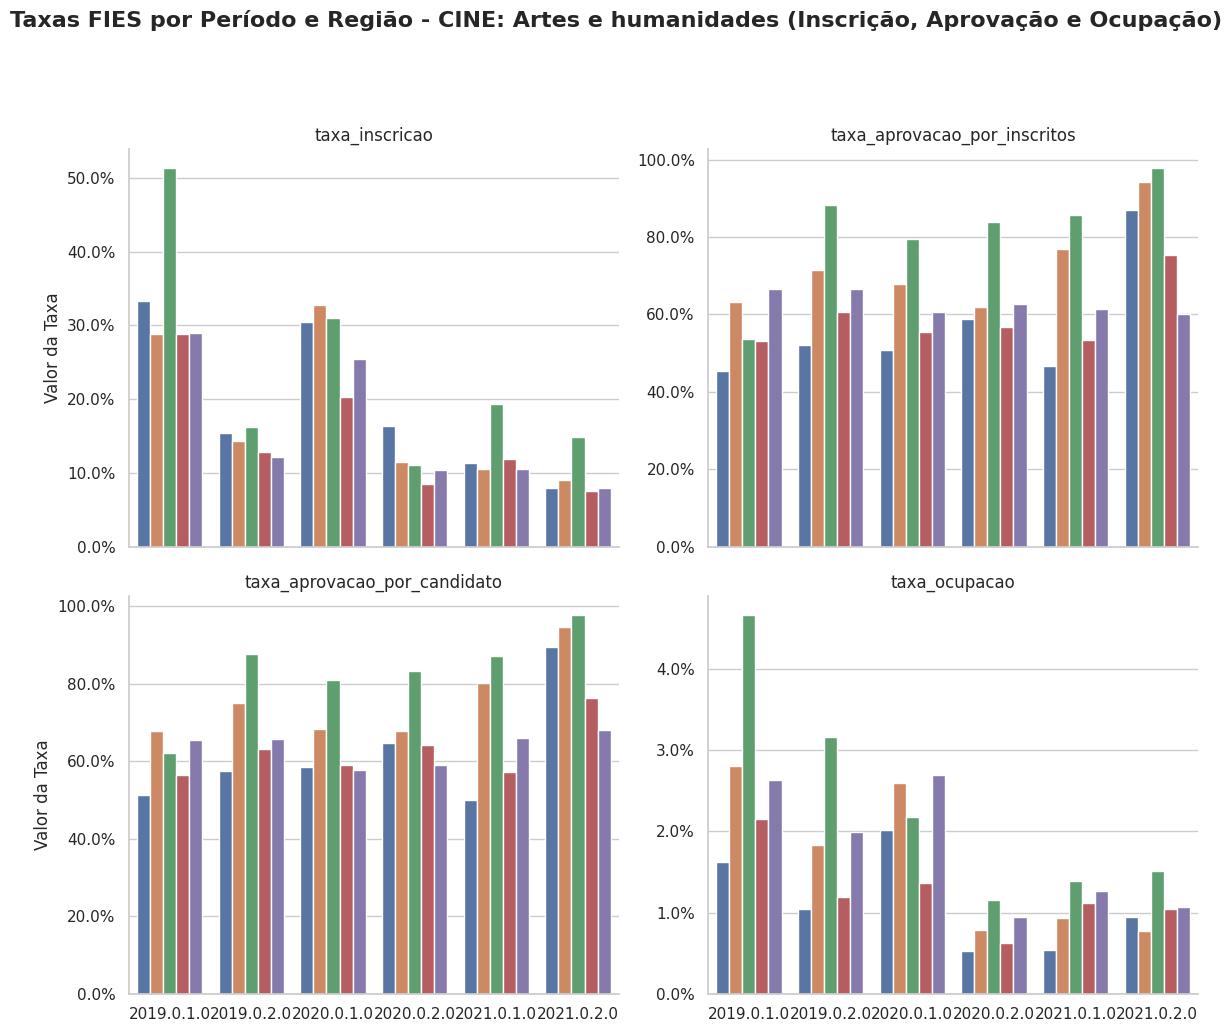

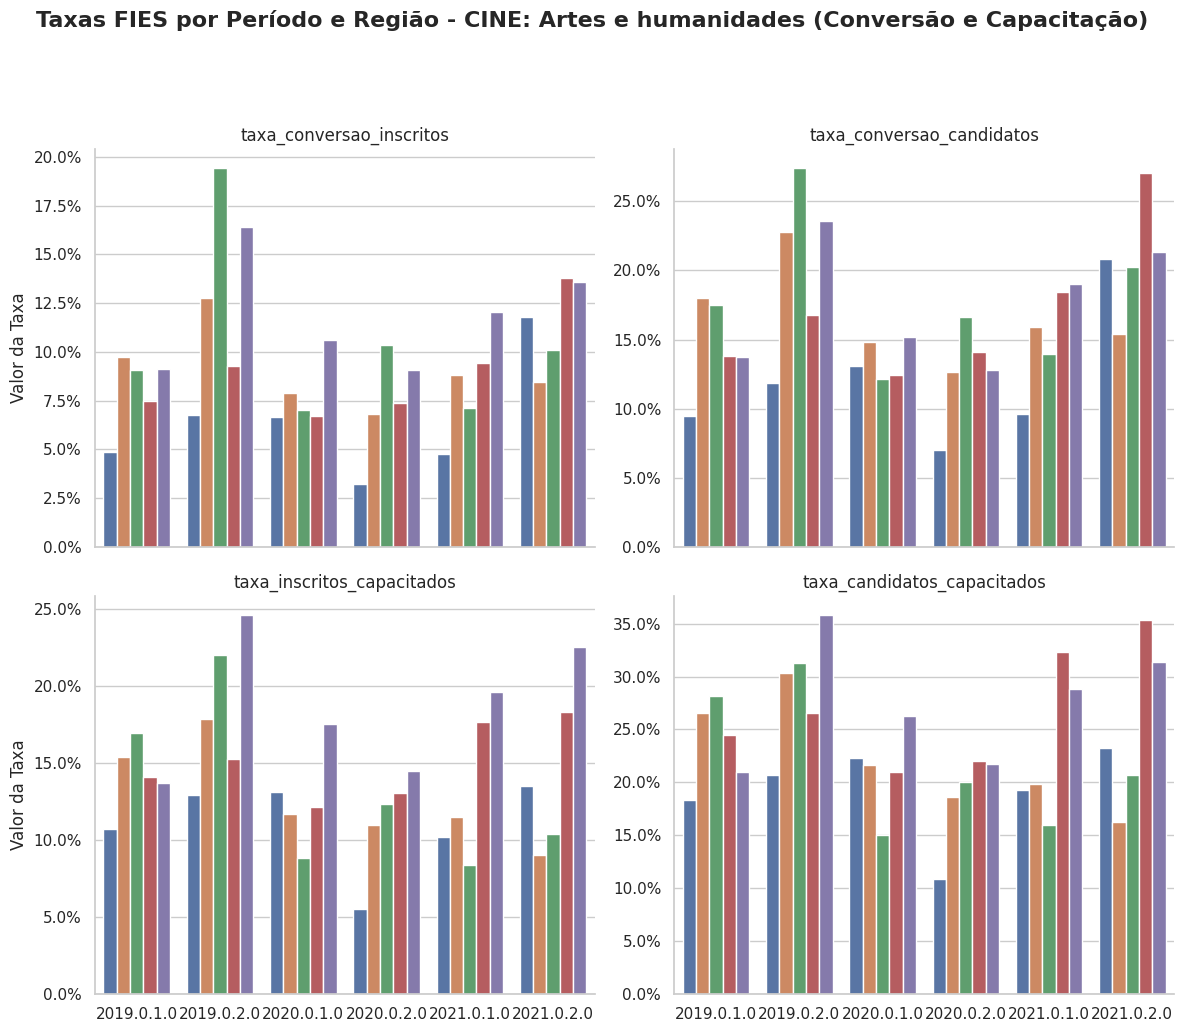


--- Processando CINE: Ciências naturais, matemática e estatística ---


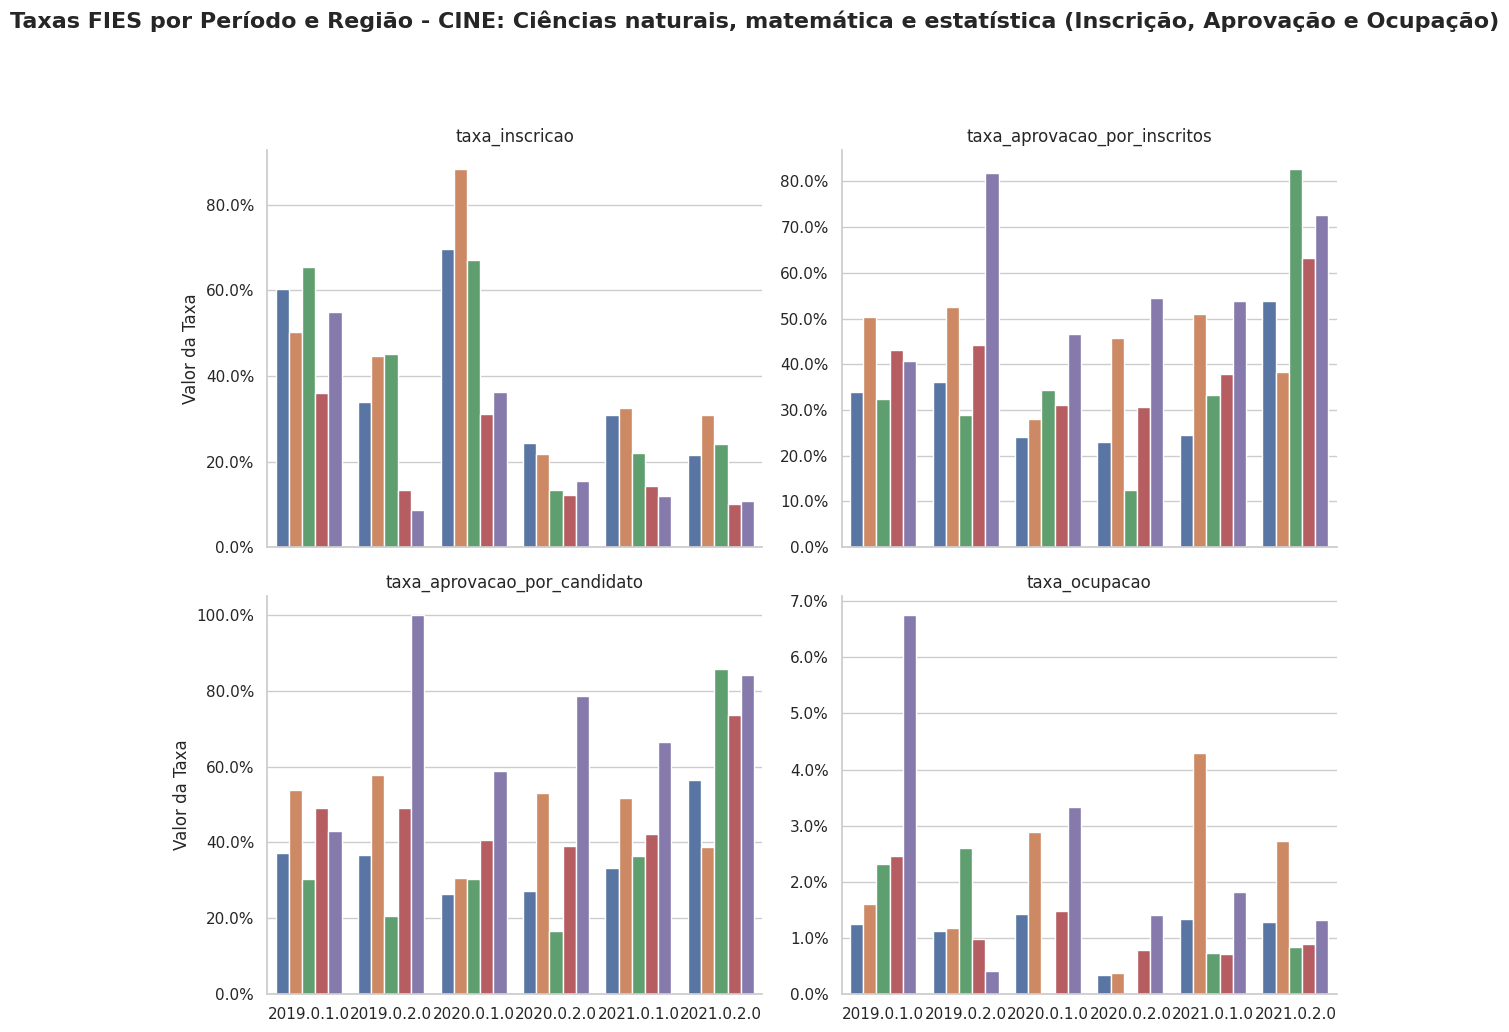

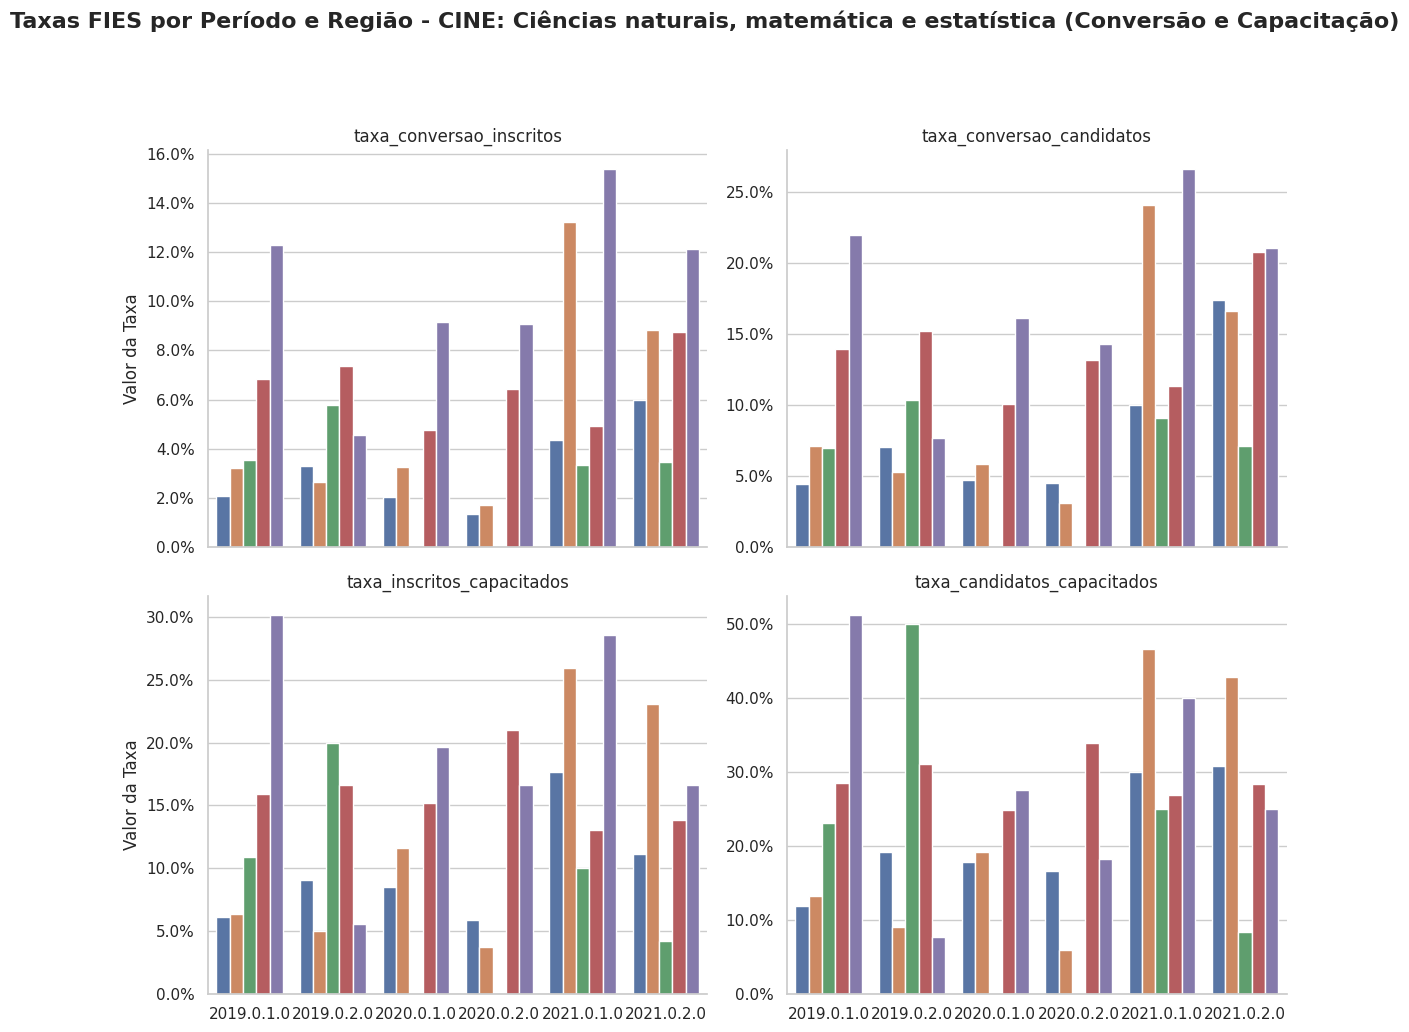


--- Processando CINE: Ciências sociais, comunicação e informação ---


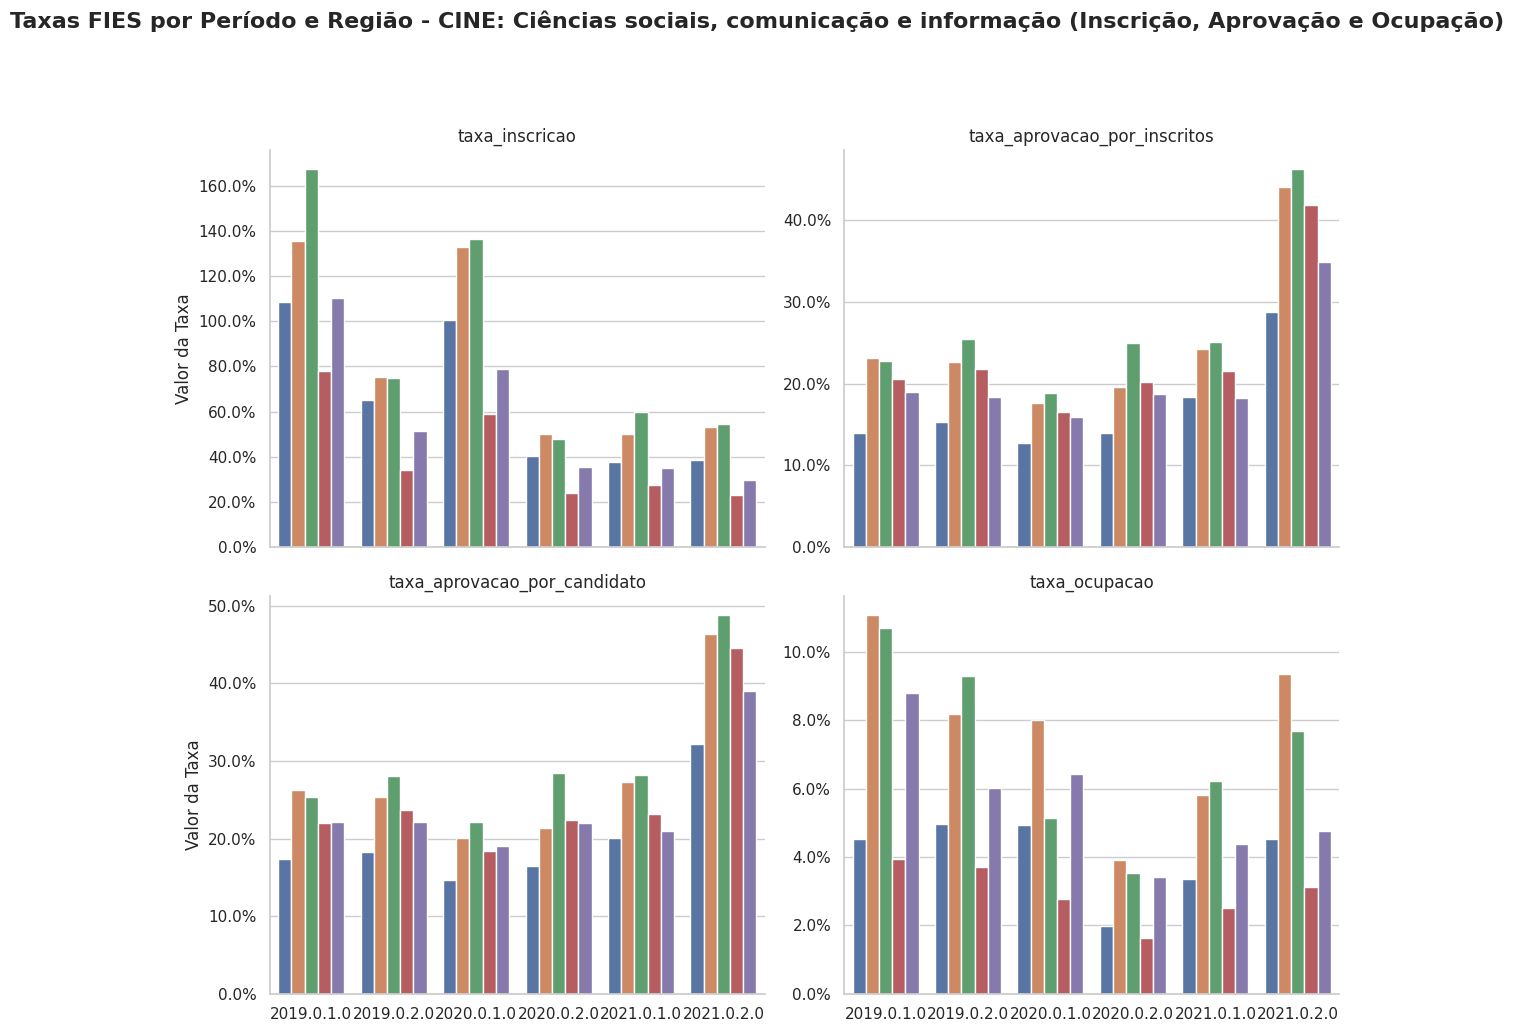

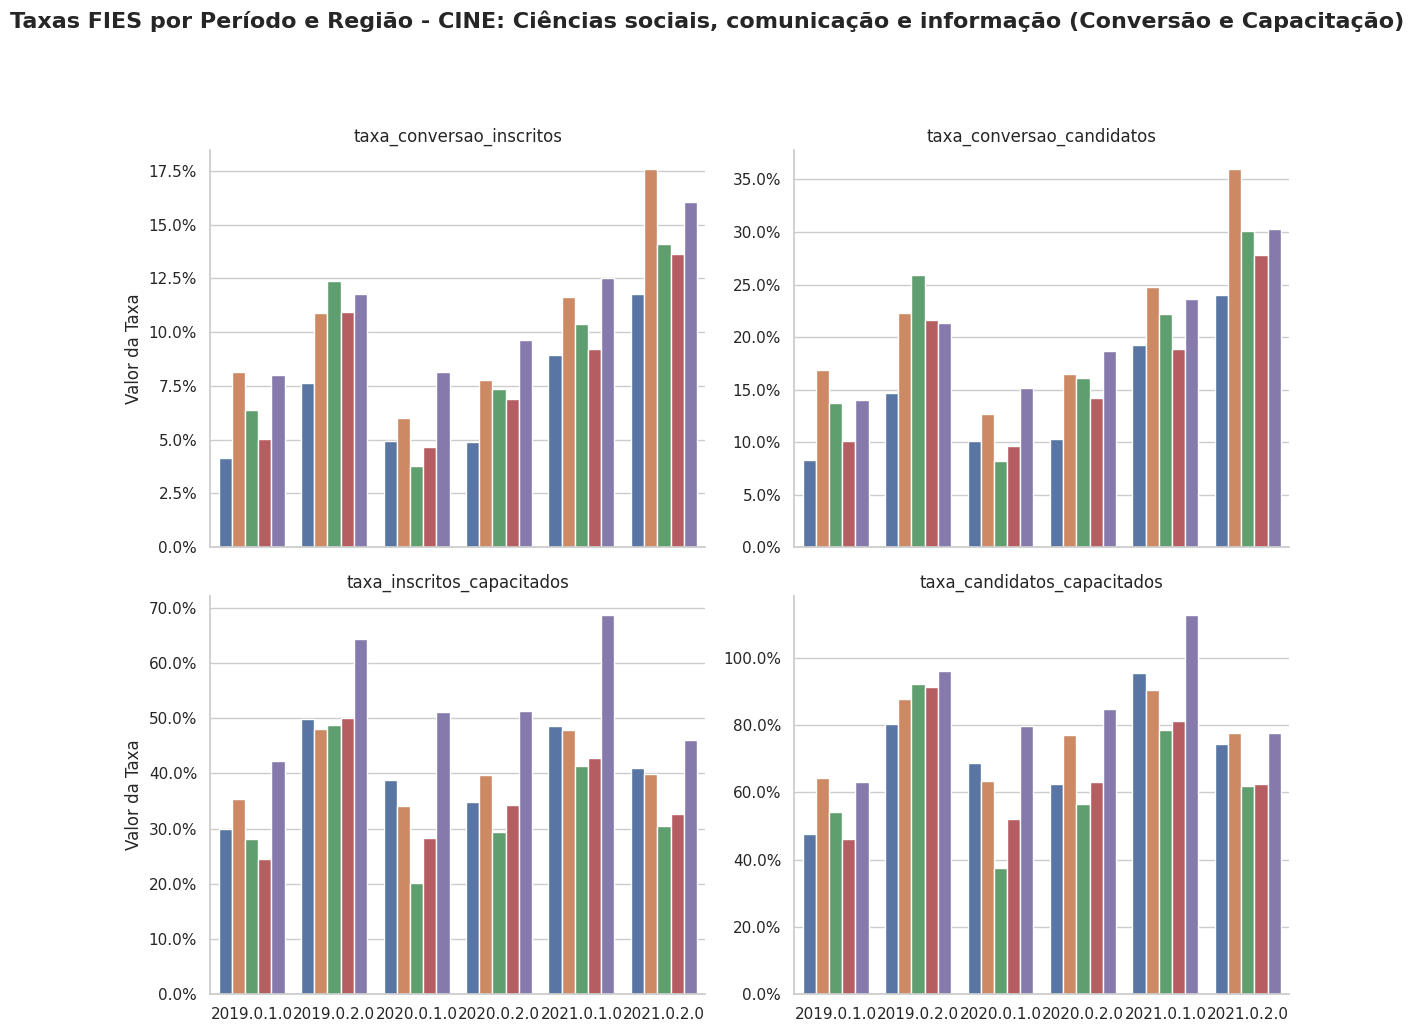


--- Processando CINE: Computação e Tecnologias da Informação e Comunicação (TIC) ---


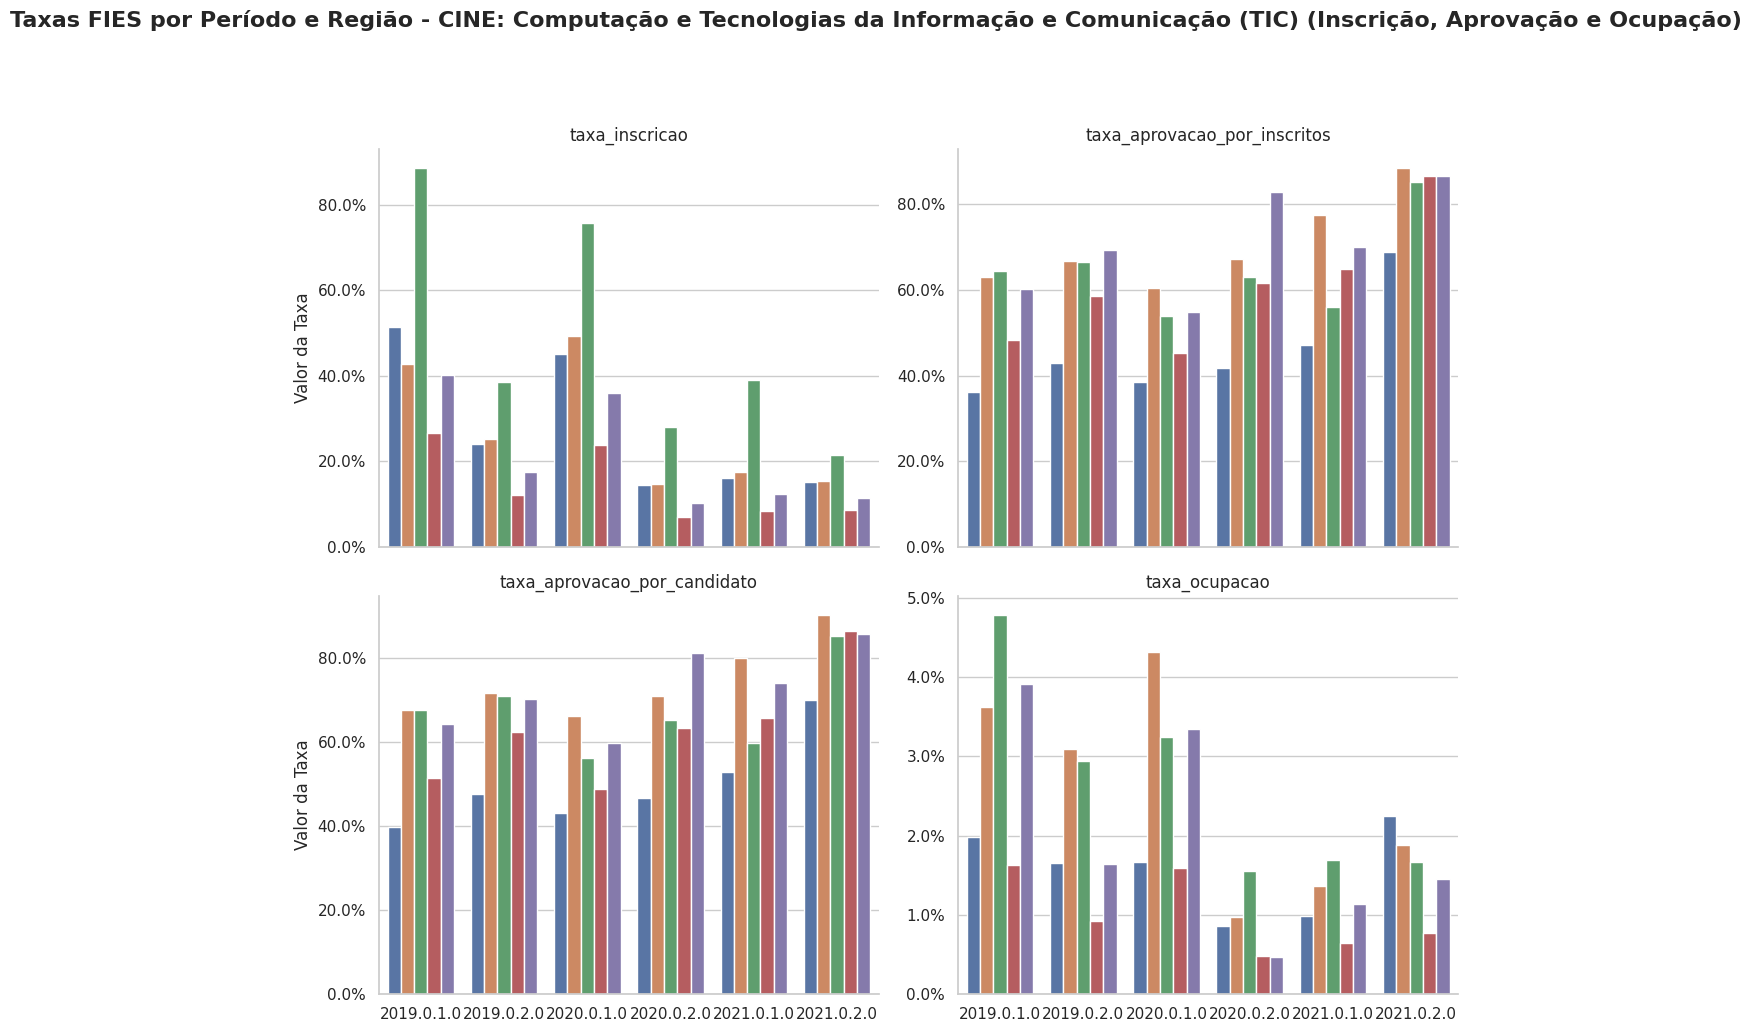

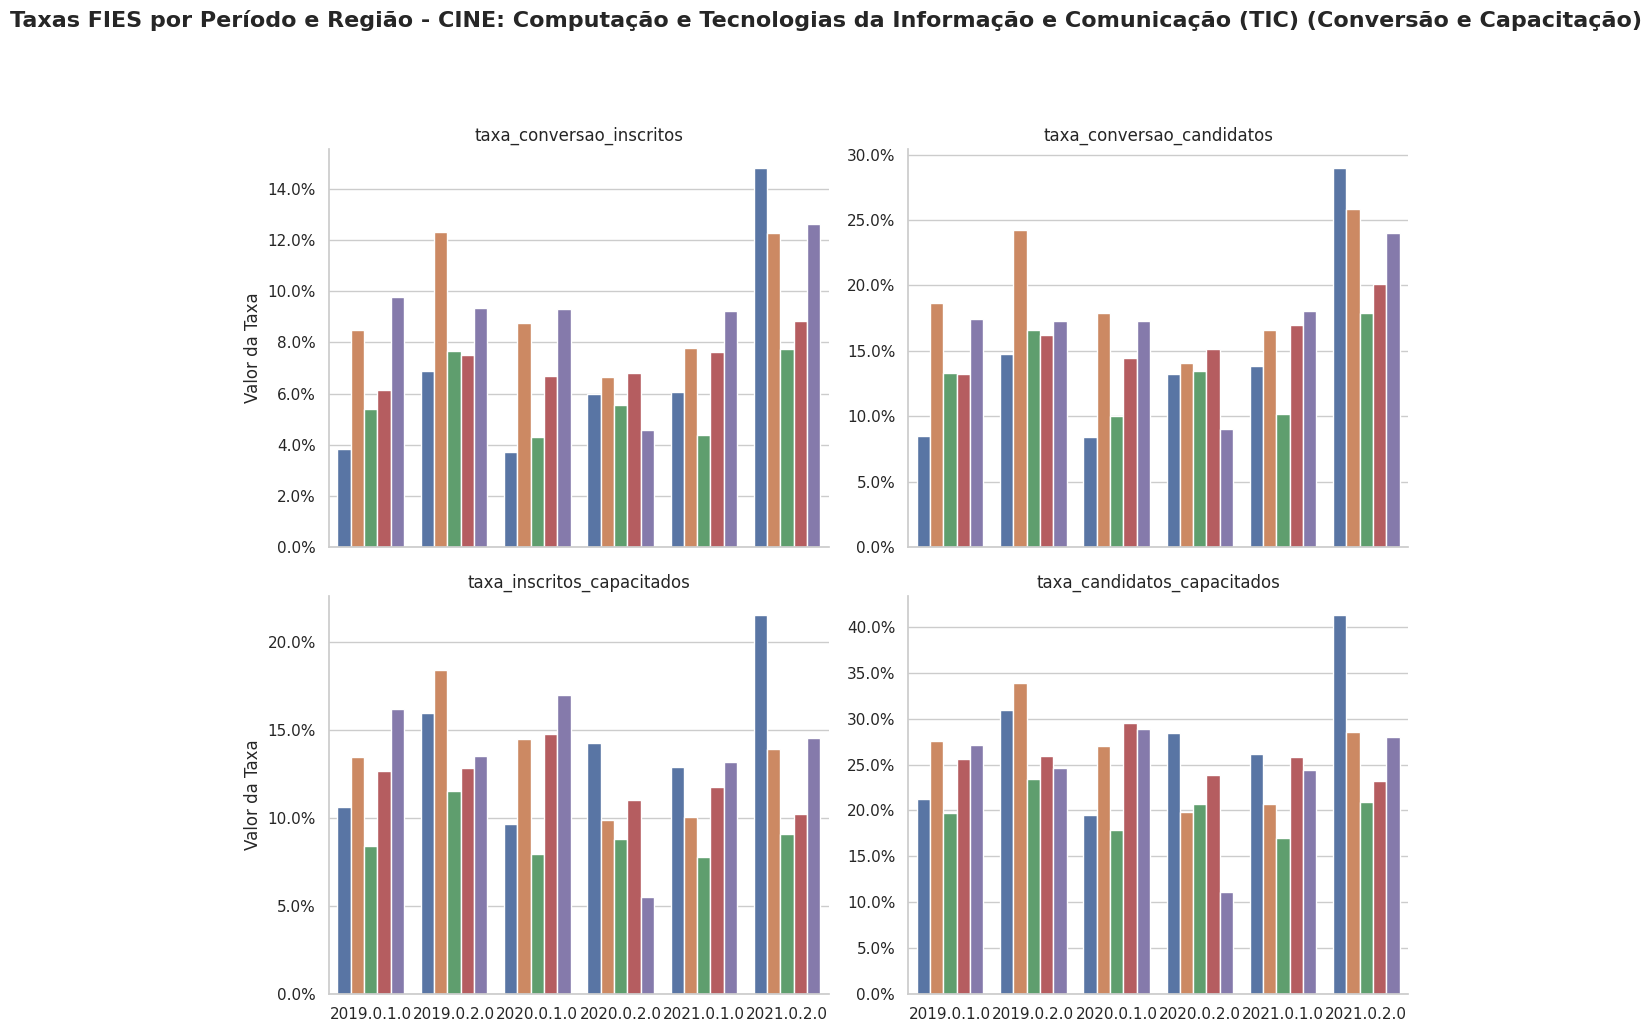


--- Processando CINE: Educação ---


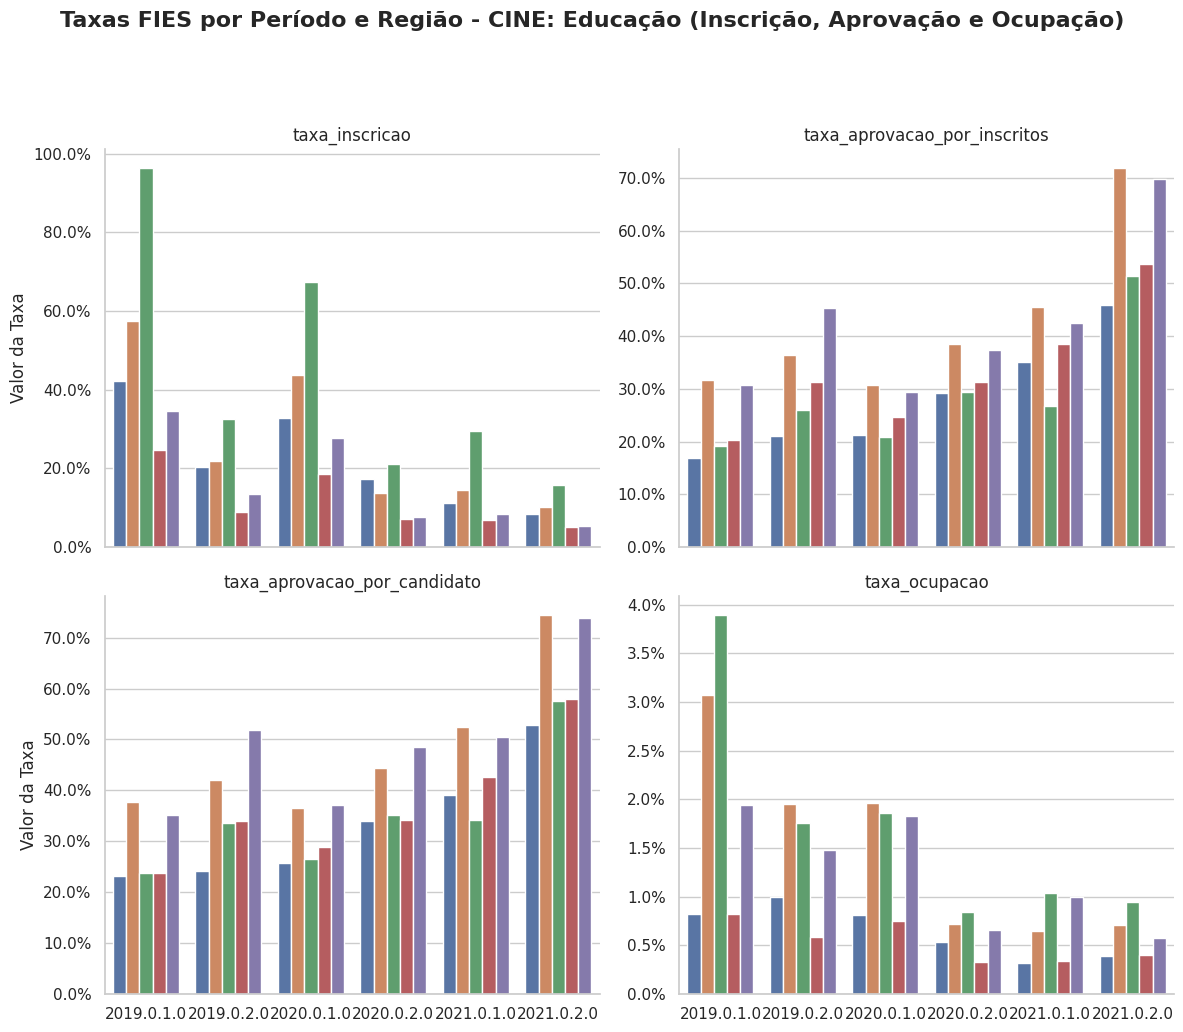

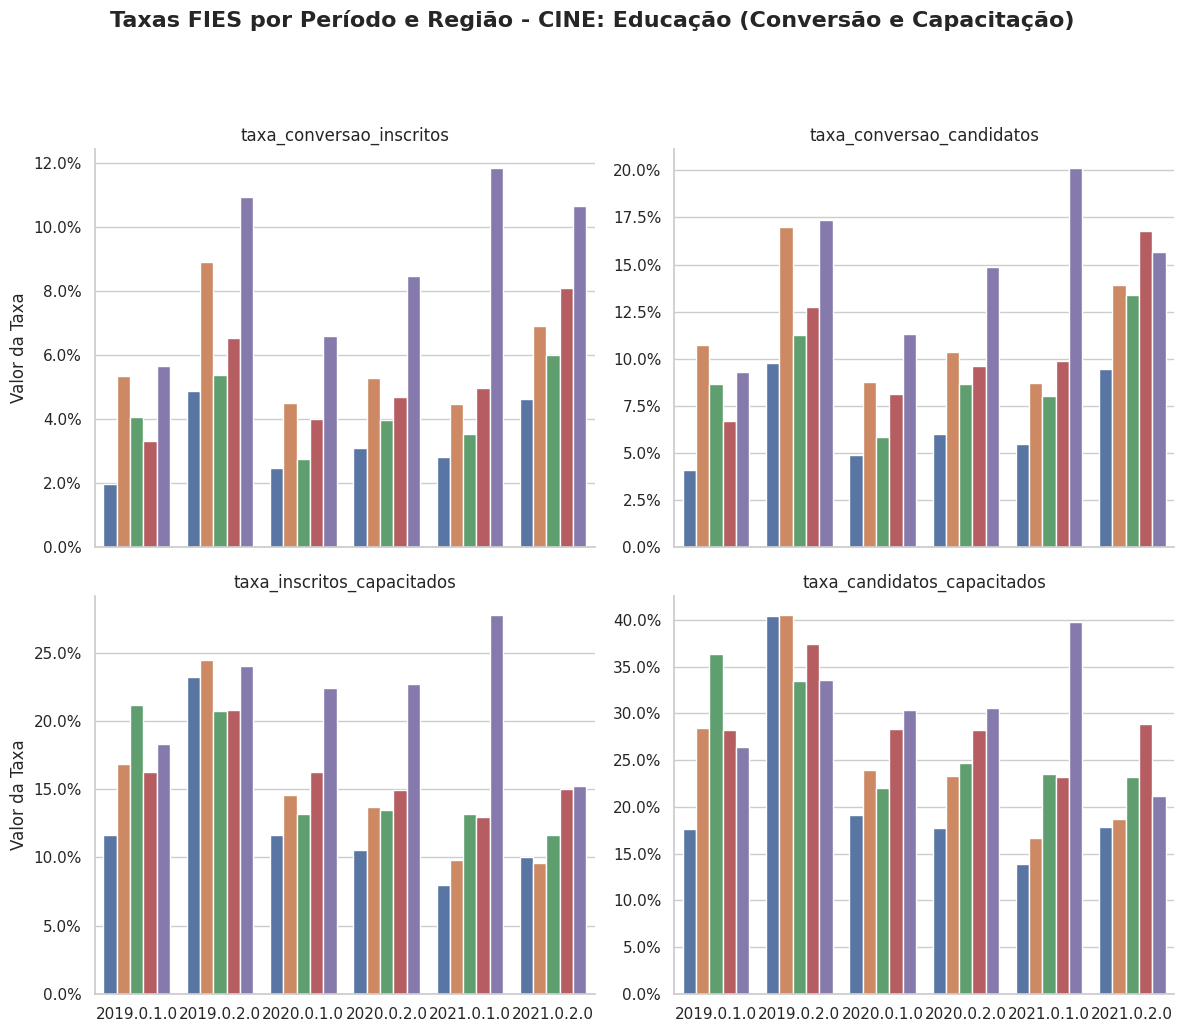


--- Processando CINE: Engenharia, produção e construção ---


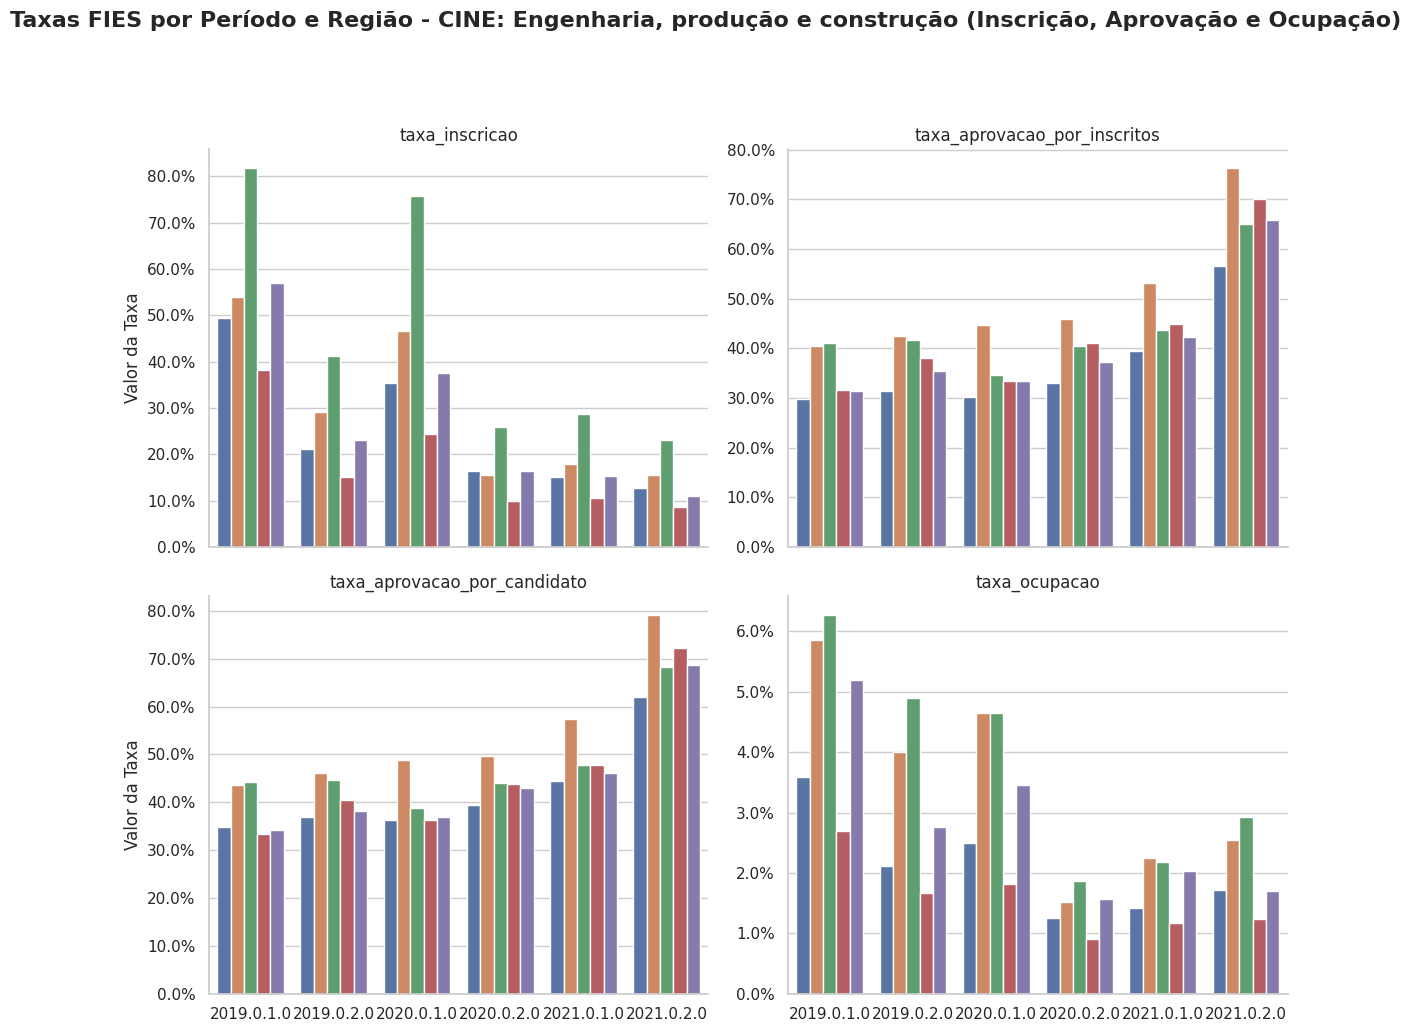

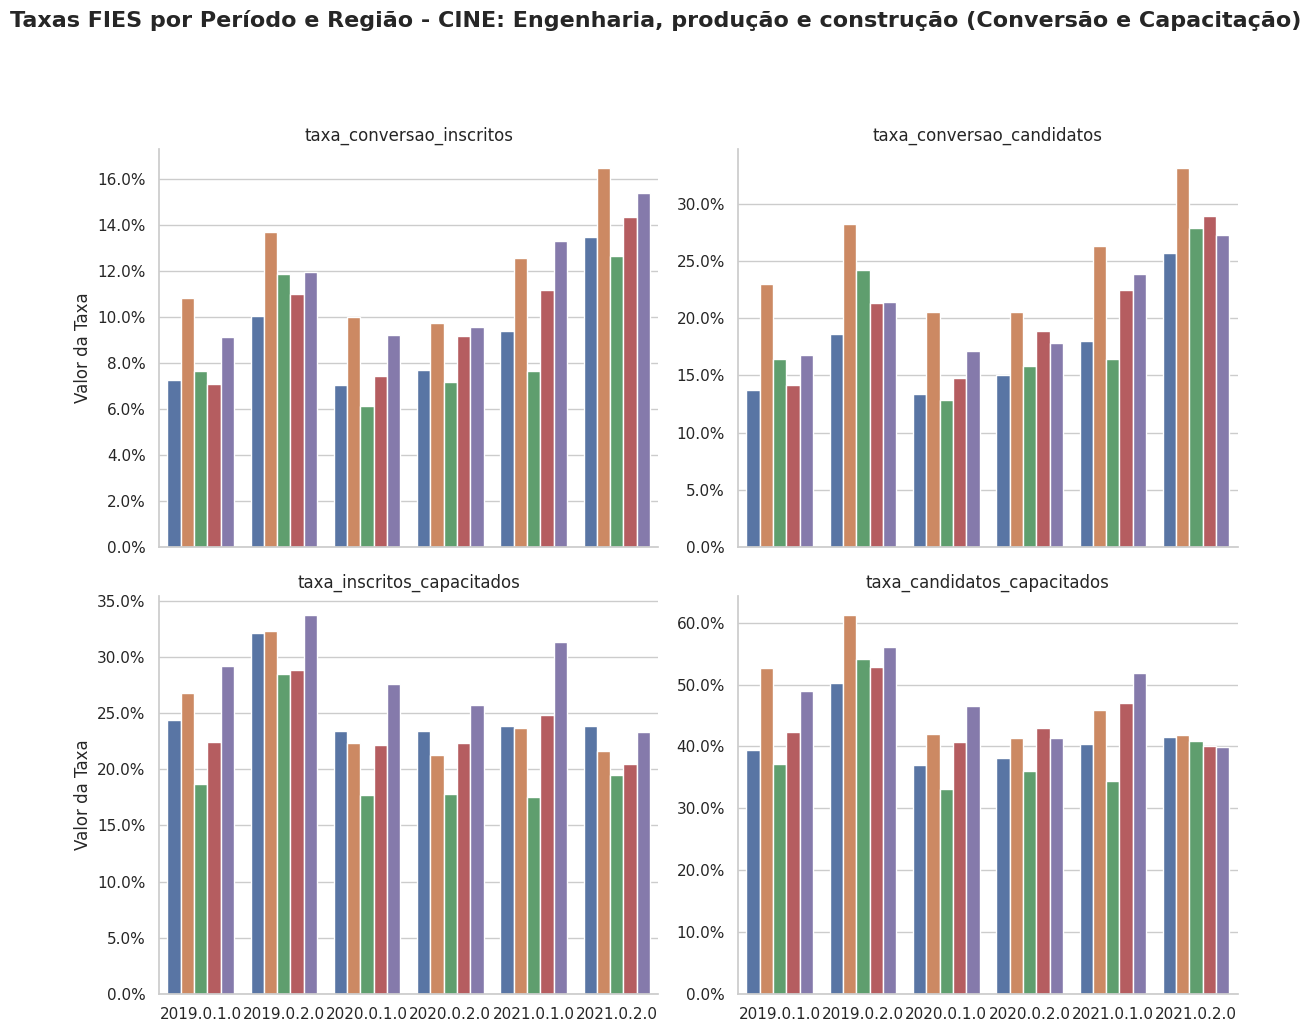


--- Processando CINE: Negócios, administração e direito ---


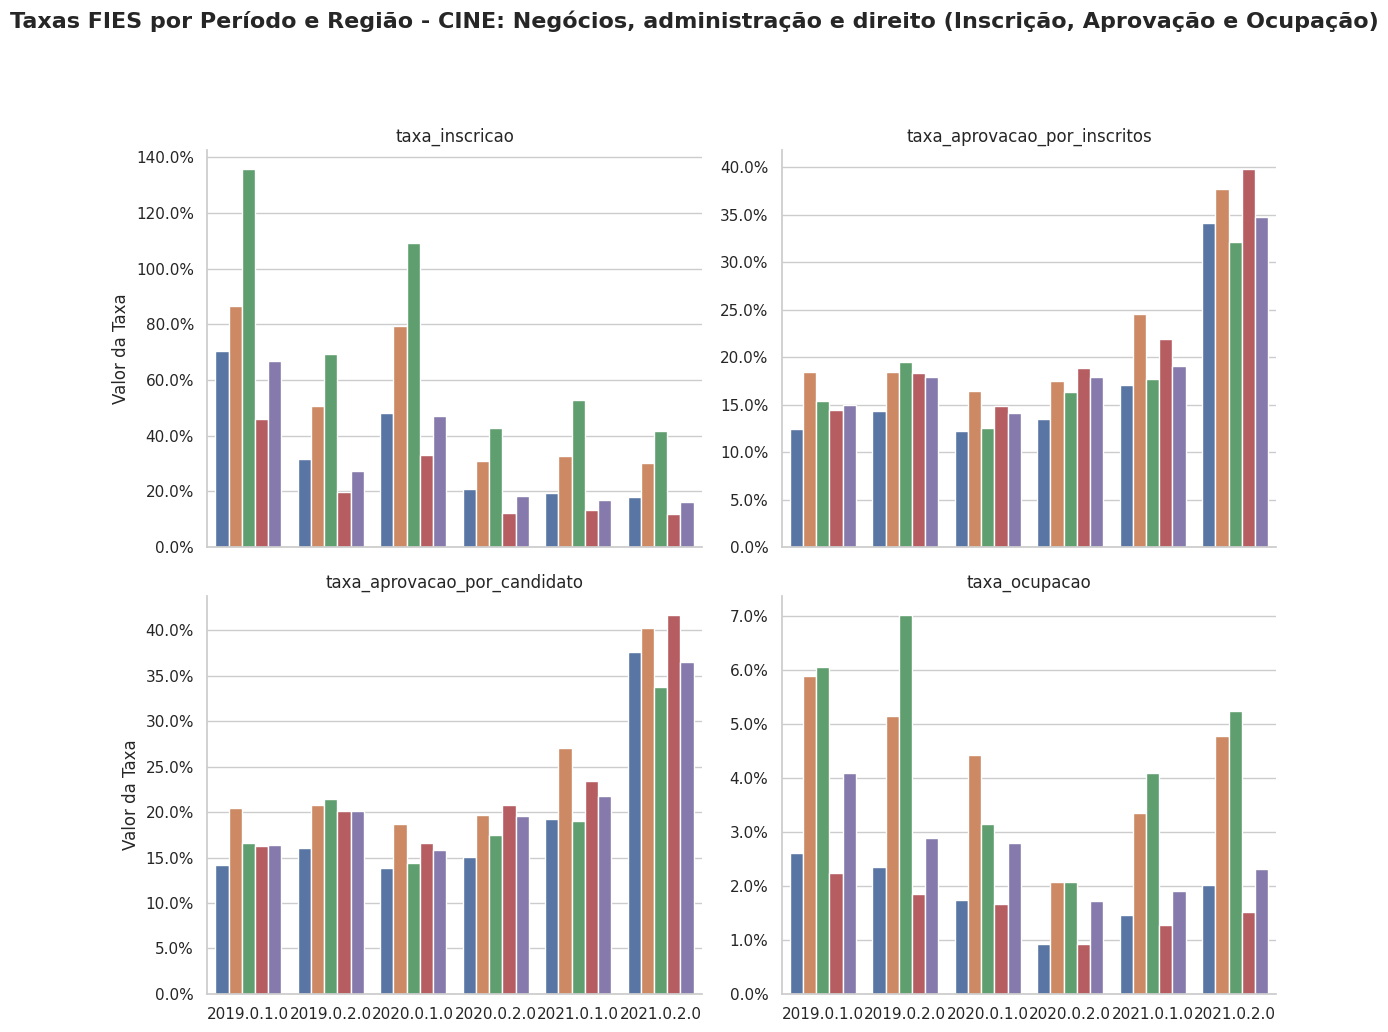

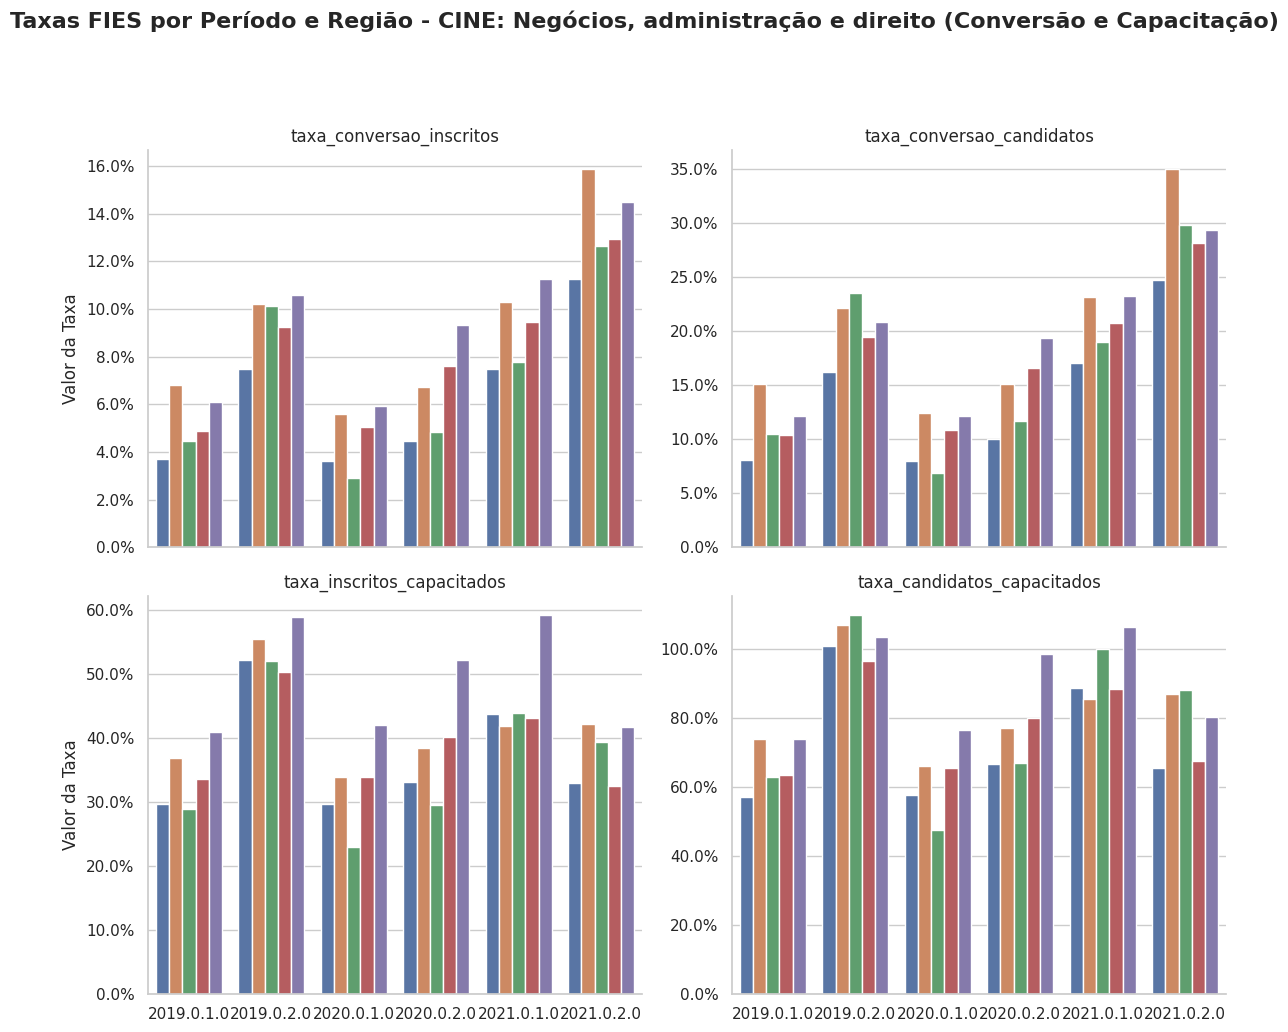


--- Processando CINE: Saúde e bem-estar ---


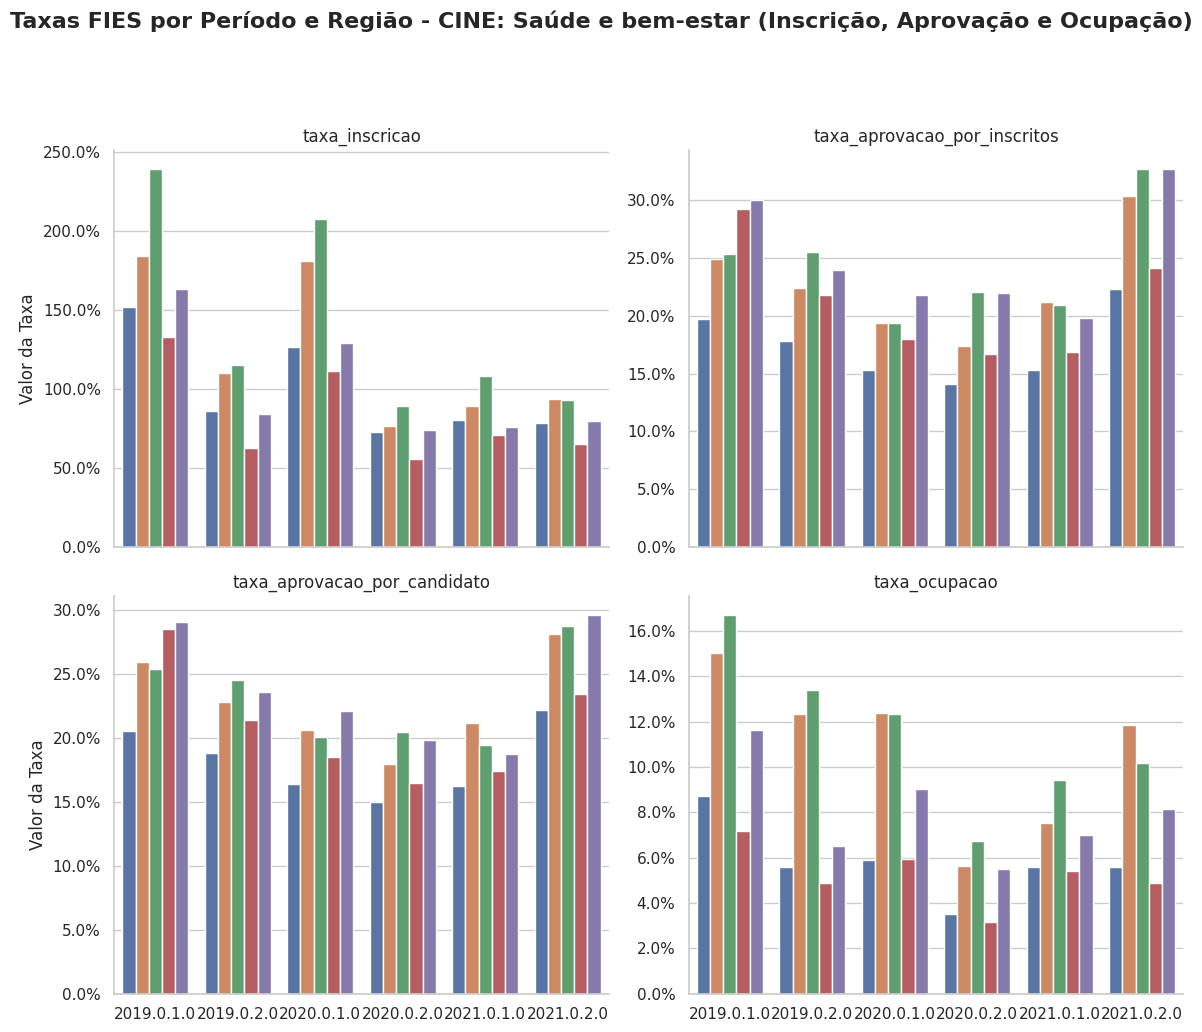

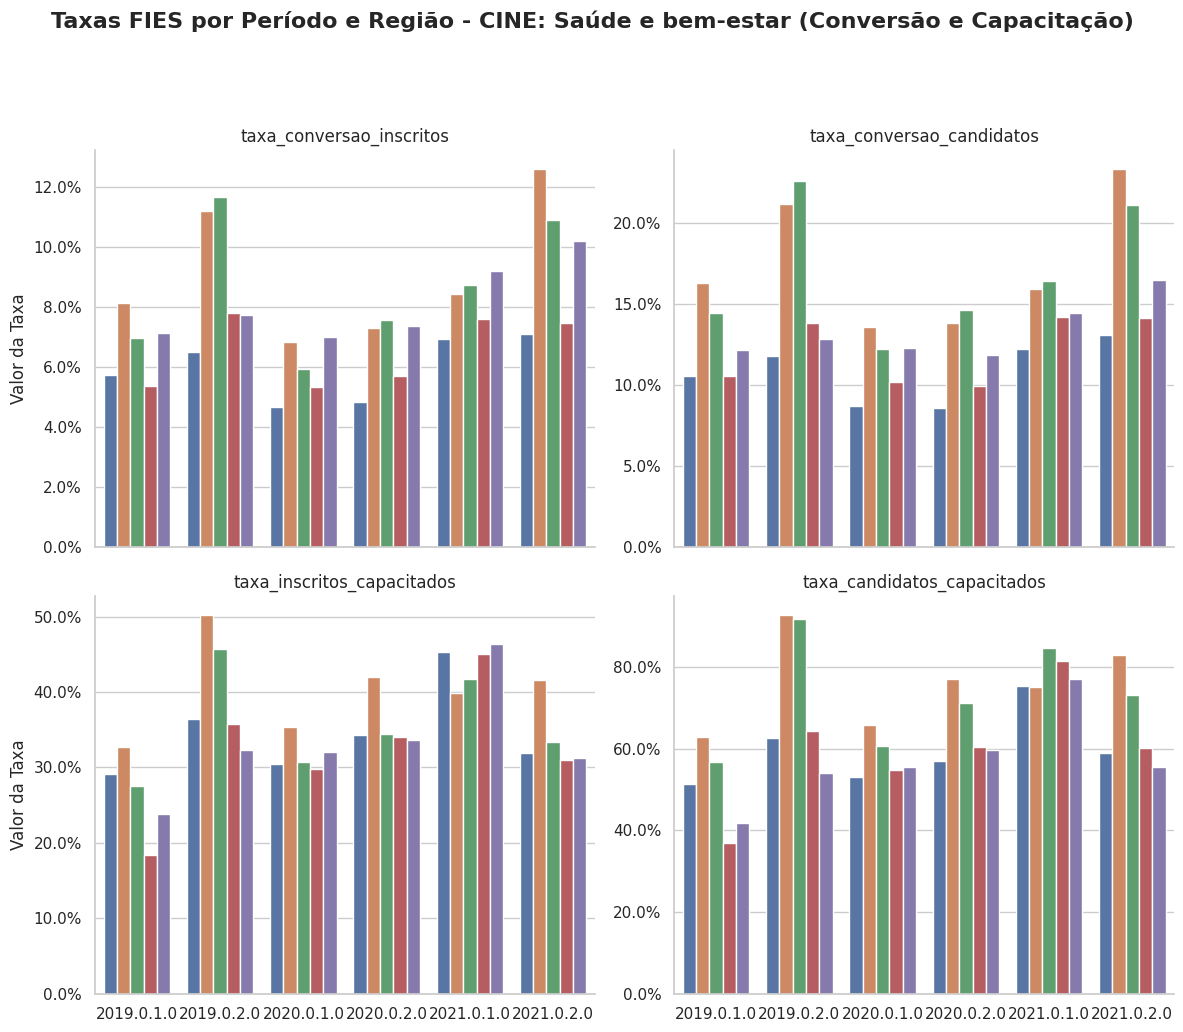


--- Processando CINE: Serviços ---


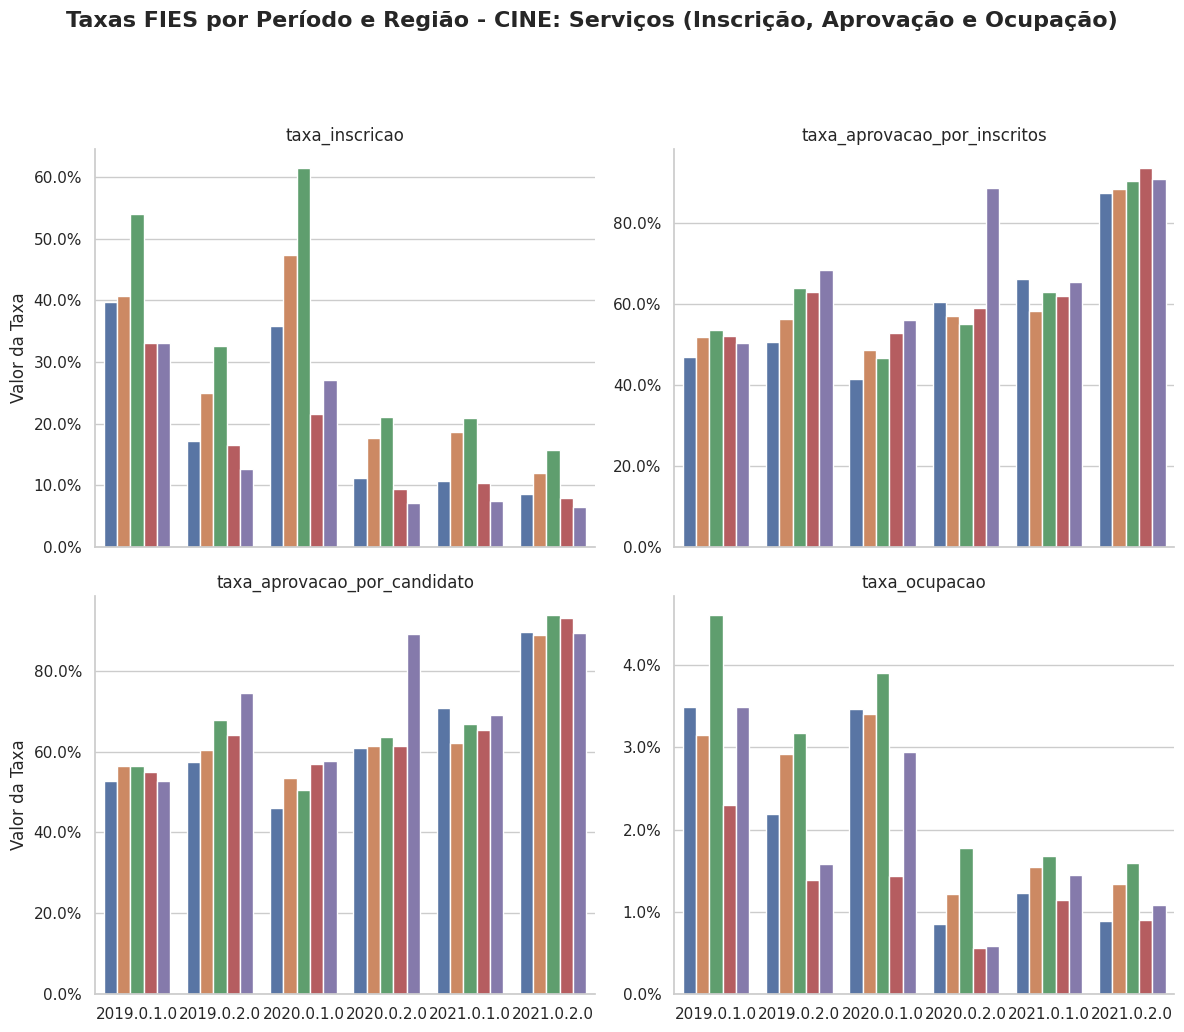

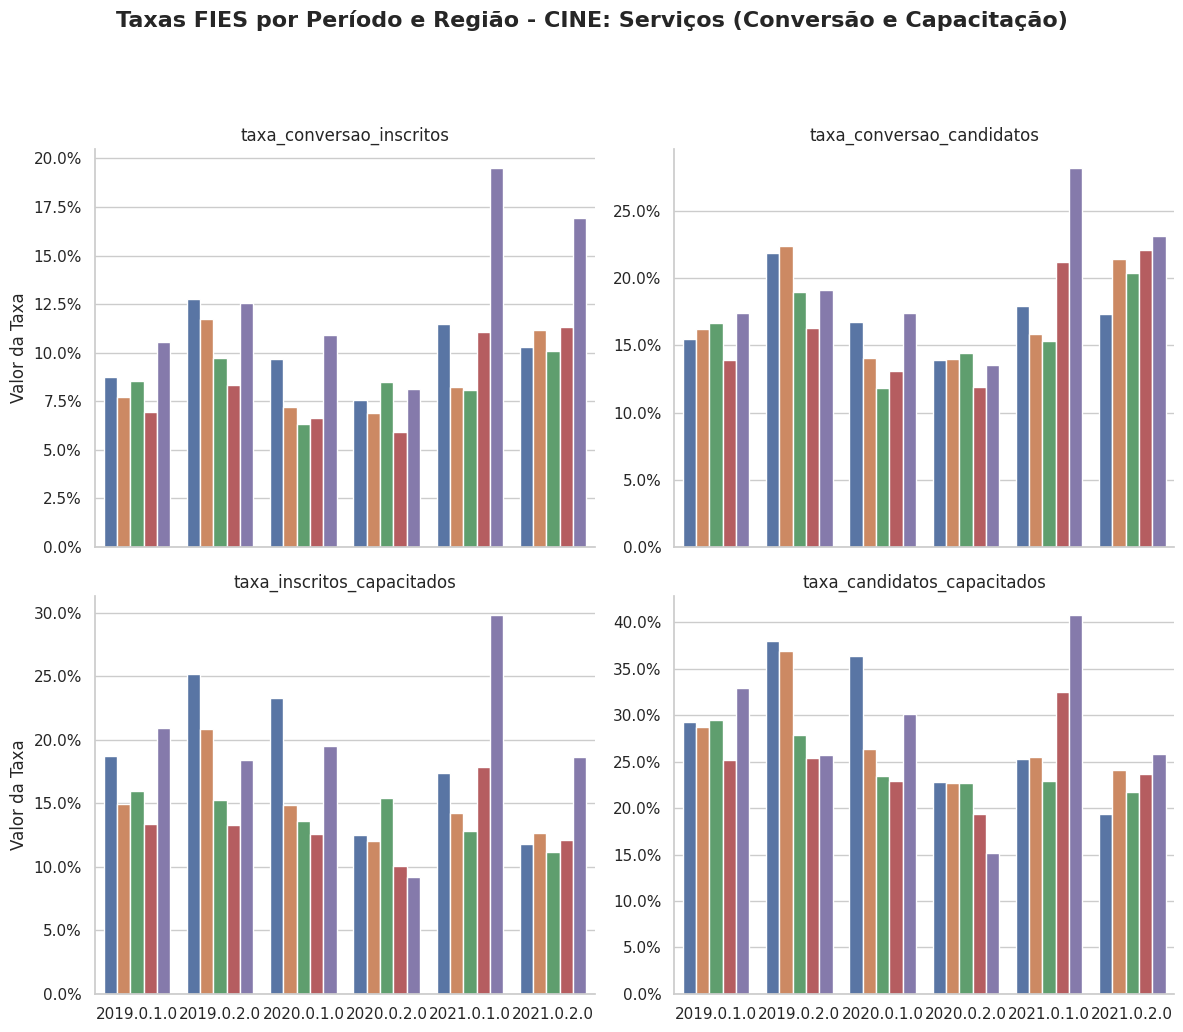


--- Gerando gráficos Nacionais Consolidados ---


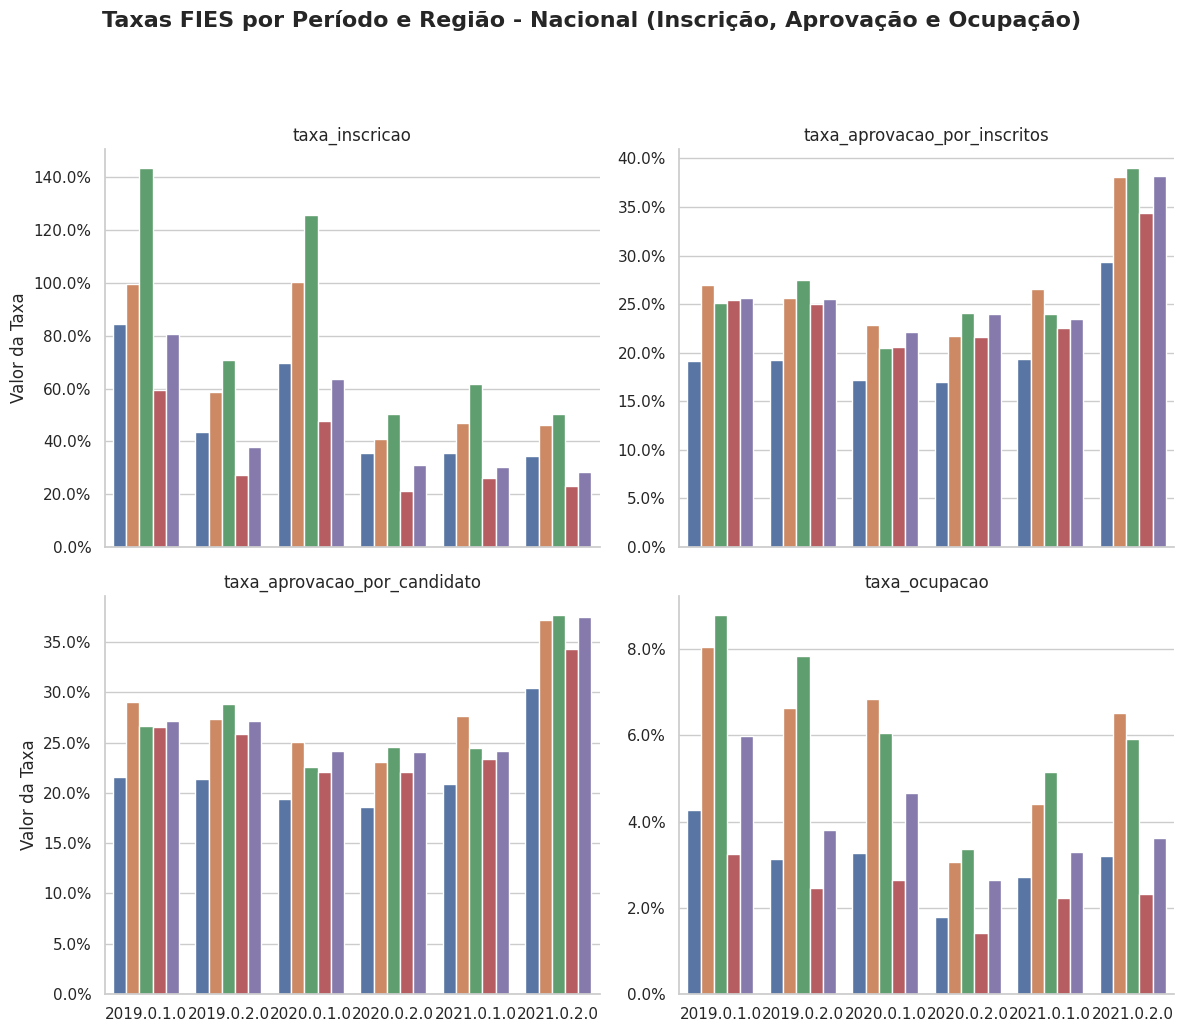

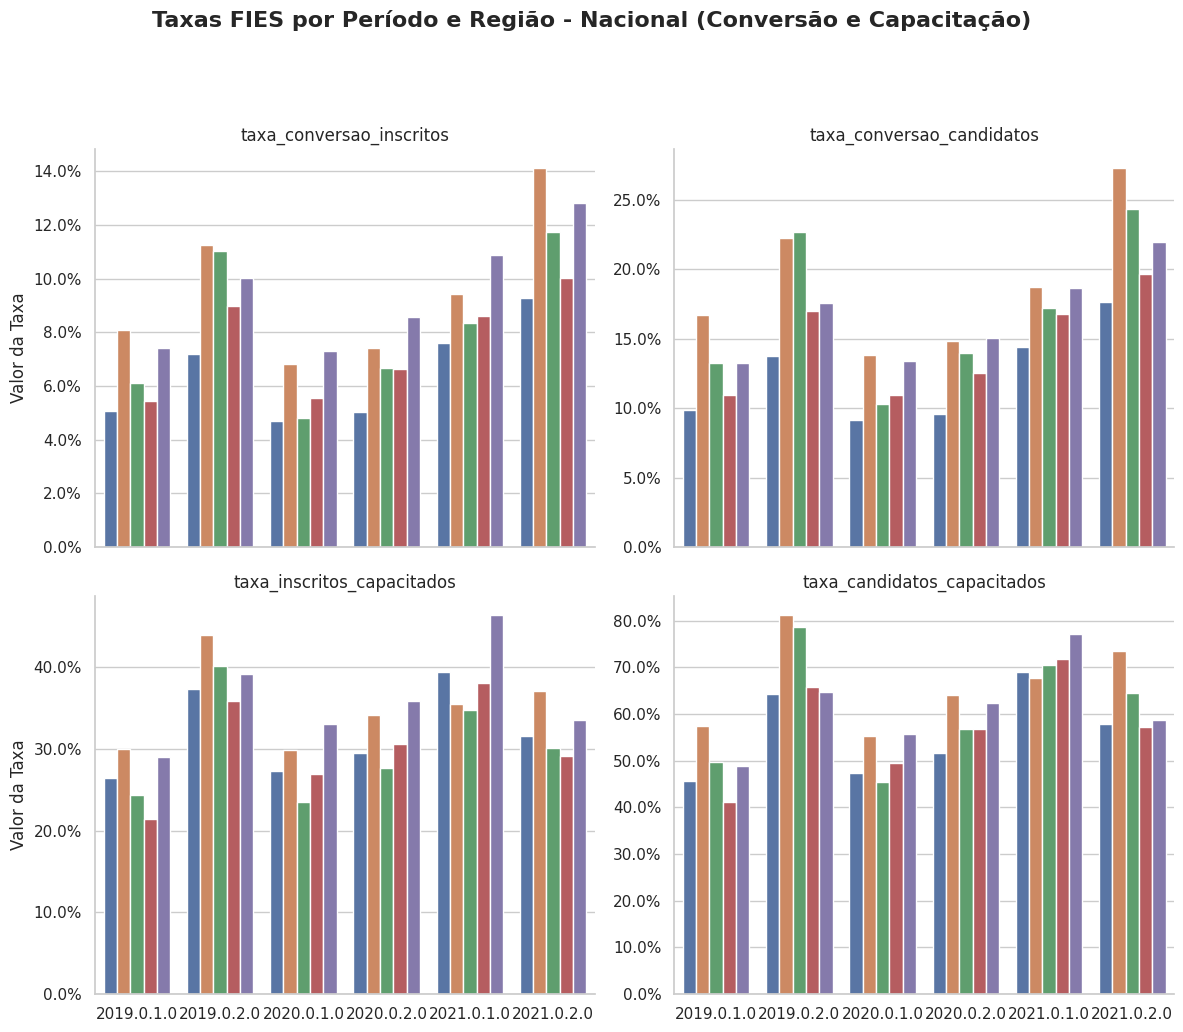



  ✅ Todos os gráficos (divididos em 2 figuras de 4) foram gerados.
  LEGENDA DAS CORES (Regiões) - Da Esquerda para a Direita em cada Grupo
1ª Barra: Centro-Oeste (Azul (Escuro))
2ª Barra: Nordeste (Laranja (Queimado))
3ª Barra: Norte (Verde (Garrafa))
4ª Barra: Sudeste (Vermelho (Vivo))
5ª Barra: Sul (Roxo (Ametista))
-------------------------------------------------------------------------
  LEGENDA DOS RÓTULOS (Período)
O rótulo na base (ex: '2019.1' ou '2019.0.1.0') representa o Período Ano.Semestre lido diretamente do seu CSV.
Este rótulo está centralizado sobre o grupo inteiro de 5 barras (regiões) daquele período.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

# --- 1. Configuração e Carregamento de Dados ---

path_lido = '../../../planilhas/processado/modulo_4/taxas_por_uf_regiao_cine/taxas_por_regiao.csv'

try:
    # Lendo o arquivo CSV que contém as taxas
    df_agg = pd.read_csv(path_lido)
    print(f"✅ Arquivo de taxas lido com sucesso de: {path_lido}")
except FileNotFoundError:
    print(f"❌ Erro: Arquivo não encontrado em {path_lido}", file=sys.stderr)
    print("Por favor, execute o script de cálculo e verifique o caminho.", file=sys.stderr)
    sys.exit(1)

# Configuração visual
sns.set_theme(style="whitegrid", palette="deep") 

# --- CRIAÇÃO DO RÓTULO DE PERÍODO (MANTENDO O FORMATO DO CSV LIDO) ---
# Usando as colunas ano e semestre como string, sem conversão forçada
df_agg['periodo'] = df_agg['ano'].astype(str) + '.' + df_agg['semestre'].astype(str)

# Determinar a ordem dos períodos encontrados nos dados
ordem_periodo = sorted(df_agg['periodo'].unique())

print(f"Períodos detectados nos dados: {ordem_periodo}")


# Listas das 8 colunas de taxas (mantendo a divisão em 2 figuras de 4)
colunas_taxas_fig_1 = [
    'taxa_inscricao',
    'taxa_aprovacao_por_inscritos',
    'taxa_aprovacao_por_candidato',
    'taxa_ocupacao'
]
colunas_taxas_fig_2 = [
    'taxa_conversao_inscritos',
    'taxa_conversao_candidatos',
    'taxa_inscritos_capacitados',
    'taxa_candidatos_capacitados'
]

# "Derreter" (melt) o DataFrame para o formato longo
df_melted = df_agg.melt(
    id_vars=['periodo', 'regiao', 'nome_cine_area_geral'],
    value_vars=colunas_taxas_fig_1 + colunas_taxas_fig_2,
    var_name='taxa_nome',
    value_name='taxa_valor'
)

# Limpeza de dados (para divisões por zero, que causam valores infinitos)
df_melted.replace([np.inf, -np.inf], np.nan, inplace=True)
df_melted['taxa_valor'].fillna(0, inplace=True)

areas_cine = df_melted['nome_cine_area_geral'].unique()

# Ordem exata das regiões e cores para o PRINT final
regioes_ordenadas = df_agg['regiao'].unique()
cores_deep = [
    'Azul (Escuro)', 
    'Laranja (Queimado)', 
    'Verde (Garrafa)', 
    'Vermelho (Vivo)', 
    'Roxo (Ametista)'
]

# CRIAÇÃO DO PRINT DE REGIÕES COM \n
print_map_regiao = ""
for i, regiao in enumerate(regioes_ordenadas):
    cor_desc = cores_deep[i % len(cores_deep)]
    print_map_regiao += f"{i+1}ª Barra: {regiao} ({cor_desc})\n"

# --- 2. Função de Plotagem (Reutilizável) ---

def plotar_taxas(df, taxas_a_plotar, titulo_sufixo, ordem_periodo):
    """Gera um catplot para um subconjunto de taxas (2x2)."""
    df_subset = df[df['taxa_nome'].isin(taxas_a_plotar)]
    
    g = sns.catplot(
        data=df_subset,
        x='periodo',           
        y='taxa_valor',
        hue='regiao',          
        col='taxa_nome',       
        kind='bar',
        col_wrap=2,            
        height=5,              
        aspect=1.2,
        order=ordem_periodo,
        legend=False,          
        sharey=False           
    )
    
    # --- Ajustes e Rótulos ---
    g.fig.suptitle(f'{titulo_sufixo}', y=1.03, fontsize=16, weight='bold')
    g.set_titles("{col_name}", size=12)
    
    # CORRIGIDO: Removendo o rótulo descritivo do eixo X, deixando apenas os números.
    g.set_axis_labels("", "Valor da Taxa") 
    
    # Usando os rótulos de período (ex: 2019.0.1.0 ou 2019.1) lidos do CSV
    g.set_xticklabels(ordem_periodo)
    
    # Formatação do Eixo Y
    for ax in g.axes.flat:
        max_y = ax.get_ylim()[1]
        # Aplica formatação percentual se o máximo for pequeno (taxas)
        if max_y <= 4: 
             ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1%}'))
        else:
             ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# --- 3. Geração dos Gráficos por Área CINE (Duas Figuras) ---

for area in areas_cine:
    print(f"\n--- Processando CINE: {area} ---")
    df_area = df_melted[df_melted['nome_cine_area_geral'] == area]
    
    # Figura 1: Inscrição, Aprovação e Ocupação (4 gráficos)
    plotar_taxas(
        df=df_area,
        taxas_a_plotar=colunas_taxas_fig_1,
        titulo_sufixo=f'Taxas FIES por Período e Região - CINE: {area} (Inscrição, Aprovação e Ocupação)',
        ordem_periodo=ordem_periodo
    )

    # Figura 2: Conversão e Capacitação (4 gráficos)
    plotar_taxas(
        df=df_area,
        taxas_a_plotar=colunas_taxas_fig_2,
        titulo_sufixo=f'Taxas FIES por Período e Região - CINE: {area} (Conversão e Capacitação)',
        ordem_periodo=ordem_periodo
    )


# --- 4. Geração do Gráfico Nacional Consolidado (Duas Figuras) ---

print("\n--- Gerando gráficos Nacionais Consolidados ---")

# --- 4.1 Recalcular Agregados Nacionais ---
colunas_base_agg = [
    'vagas_fies', 'Inscritos_Geral', 'inscritos_com_nota_suficiente',
    'Candidatos_Unicos_Geral', 'candidatos_unicos_com_nota_suficiente', 'vagas_ocupadas'
]
df_nacional_reg = (
    df_agg.groupby(['ano', 'semestre', 'regiao', 'periodo'], as_index=False)[colunas_base_agg]
    .sum()
)

# Recalcular as 8 taxas
df_nacional_reg['taxa_inscricao'] = (df_nacional_reg['Inscritos_Geral'] / df_nacional_reg['vagas_fies'])
df_nacional_reg['taxa_aprovacao_por_inscritos'] = (df_nacional_reg['inscritos_com_nota_suficiente'] / df_nacional_reg['Inscritos_Geral'])
df_nacional_reg['taxa_aprovacao_por_candidato'] = (df_nacional_reg['candidatos_unicos_com_nota_suficiente'] / df_nacional_reg['Candidatos_Unicos_Geral'])
df_nacional_reg['taxa_ocupacao'] = (df_nacional_reg['vagas_ocupadas'] / df_nacional_reg['vagas_fies'])
df_nacional_reg['taxa_conversao_inscritos'] = (df_nacional_reg['vagas_ocupadas'] / df_nacional_reg['Inscritos_Geral'])
df_nacional_reg['taxa_conversao_candidatos'] = (df_nacional_reg['vagas_ocupadas'] / df_nacional_reg['Candidatos_Unicos_Geral'])
df_nacional_reg['taxa_inscritos_capacitados'] = (df_nacional_reg['vagas_ocupadas'] / df_nacional_reg['inscritos_com_nota_suficiente'])
df_nacional_reg['taxa_candidatos_capacitados'] = (df_nacional_reg['vagas_ocupadas'] / df_nacional_reg['candidatos_unicos_com_nota_suficiente'])

df_nacional_reg.replace([np.inf, -np.inf], np.nan, inplace=True)
df_nacional_reg.fillna(0, inplace=True)

# Melt
df_nacional_melted = df_nacional_reg.melt(
    id_vars=['periodo', 'regiao'],
    value_vars=colunas_taxas_fig_1 + colunas_taxas_fig_2,
    var_name='taxa_nome',
    value_name='taxa_valor'
)


# Figura 1 Nacional: Inscrição, Aprovação e Ocupação (4 gráficos)
plotar_taxas(
    df=df_nacional_melted,
    taxas_a_plotar=colunas_taxas_fig_1,
    titulo_sufixo=f'Taxas FIES por Período e Região - Nacional (Inscrição, Aprovação e Ocupação)',
    ordem_periodo=ordem_periodo
)

# Figura 2 Nacional: Conversão e Capacitação (4 gráficos)
plotar_taxas(
    df=df_nacional_melted,
    taxas_a_plotar=colunas_taxas_fig_2,
    titulo_sufixo=f'Taxas FIES por Período e Região - Nacional (Conversão e Capacitação)',
    ordem_periodo=ordem_periodo
)

# --- 5. PRINTS FINAIS SOLICITADOS (Formatados com \n e no final) ---

print("\n\n=========================================================================")
print("  ✅ Todos os gráficos (divididos em 2 figuras de 4) foram gerados.")
print("=========================================================================")
print("  LEGENDA DAS CORES (Regiões) - Da Esquerda para a Direita em cada Grupo")
print("=========================================================================")
print(print_map_regiao.strip())
print("-------------------------------------------------------------------------")
print("  LEGENDA DOS RÓTULOS (Período)")
print("=========================================================================")
print("O rótulo na base (ex: '2019.1' ou '2019.0.1.0') representa o Período Ano.Semestre lido diretamente do seu CSV.")
print("Este rótulo está centralizado sobre o grupo inteiro de 5 barras (regiões) daquele período.")
print("=========================================================================\n")